In [1]:
from os import listdir

In [2]:
#getting the filenames
validf=list()
validfe=list()
validf1=list()
validfe1=list()
for filename in listdir('Validation\X'):
  validf.append(filename)
  validf1.append(filename)
for filename in listdir('Validation\Y'):
  validfe.append(filename)
  validfe1.append(filename)
validf.sort()
validfe.sort()
validf1.sort()
validfe1.sort()
l=len(validf)
for i in range(len(validf)):
  validf[i] = 'Validation\X'+'/'+ validf[i]
for i in range(len(validfe)):
  validfe[i] = 'Validation\Y'+'/'+ validfe[i]

In [3]:
#Ths is given to us along with problem statement
import numpy as np
def eventroll_to_multihot_vector(eventroll):
    """
    Parameters
    ----------
    eventroll : np.array
        Eventroll matrix of shape=(11, 1000).
    
    Returns
    -------
    np.array
        A multihot vector of shape=(10,)
    """
    
    # findout active events:
    active_events = (eventroll.sum(axis=1) >= 0.5).astype('float')
    
    # remove silence class:
    return np.delete(active_events, 8)

In [4]:
#Modified eventroll_to_multihotvector
import numpy as np
def eventroll_to_multihot_vector2(eventroll):
    """
    Parameters
    ----------
    eventroll : np.array
        Eventroll matrix of shape=(10, 1000).
    
    Returns
    -------
    np.array
        A multihot vector of shape=(10,)
    """
    
    # findout active events:
    active_events = (eventroll.sum(axis=1) >= 0.5).astype('float')
    
    # remove silence class:
    return active_events

In [5]:
#loading the features
valid_features=[]
for i in range(len(validf)):   #range(len(validf))  range(10)
  m=np.load(validf[i], allow_pickle=True)
  n=np.load(validfe[i], allow_pickle=True)
  n=np.delete(n, 8, 0)
  #o=eventroll_to_multihot_vector(n)
  valid_features.append([m[0].transpose(),n.transpose()])

In [6]:
import pandas as pd
valid_features_df=pd.DataFrame(valid_features,columns=['input','onehot'])
#Converting the features into array
X2=np.array(valid_features_df['input'].tolist())
y2=np.array(valid_features_df['onehot'].tolist())
#Getting the shape
import numpy as np
np.shape(X2)

(2000, 1000, 64)

In [7]:
import pickle
import joblib
filename = './audio_classification2.hdf5'
import keras
loaded_model=keras.models.load_model(filename)
val_accuracyl=loaded_model.evaluate(X2,y2,verbose=0)
print(val_accuracyl[1])  

0.10783649981021881


In [8]:
#getting the predictions from cnn for every time instant
cnn_pred2=loaded_model.predict(X2)
for i in range(2000):   #len(validf)=2000
  for j in range(1000):
    for k in range(10):
      if cnn_pred2[i][j][k]>=0.5:
        cnn_pred2[i][j][k]=1
      else:
        cnn_pred2[i][j][k]=0
#cnn_pred

63/63 [==============================] - 1s 7ms/step


In [9]:
#predicting which sounds are present in the given file
onehotp2=list()
onehotgt2=list()
for i in range(2000):  #len(validf)=2000
  tp=eventroll_to_multihot_vector2(cnn_pred2[i].transpose());
  tq=eventroll_to_multihot_vector2(y2[i].transpose());
  onehotp2.append(tp)
  onehotgt2.append(tq)

In [10]:
#f1 scores calculation for different classes
P2=np.array(onehotp2)
Q2=np.array(onehotgt2)
from sklearn.metrics import f1_score
f2=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  f2[i]=f1_score(onehotp2[:][i], onehotgt2[:][i], average='weighted')
f2

[0.9137254901960784,
 0.9137254901960784,
 0.888888888888889,
 0.9473684210526316,
 0.9473684210526316,
 0.72,
 0.8375,
 0.9066666666666666,
 0.9473684210526316,
 0.888888888888889]

In [11]:
#Mean f1 score calculation
f2m=0;
for i in range(10):
    f2m=f2m+f2[i]
f2m=f2m/10
print('Mean f1 score is: ', "%0.2f"%(f2m*100))

Mean f1 score is:  89.12


In [12]:
#Finding the accuracy for individual classes and mean accuracy
from sklearn.metrics import accuracy_score
acm2=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):
  accuracy = accuracy_score(Q2[:][i], P2[:][i])
  print('Accuracy ', 'for class ', "%d"%(i+1),': ' "%.2f" % (accuracy*100))
  acm2[i]=accuracy*100
acc2=0
for i in range(10):
  acc2=acc2 + acm2[i];
acc2=acc2/10
print('Mean accuracy is : ', "%0.2f"%(acc2))

Accuracy  for class  1 : 90.00
Accuracy  for class  2 : 90.00
Accuracy  for class  3 : 80.00
Accuracy  for class  4 : 90.00
Accuracy  for class  5 : 90.00
Accuracy  for class  6 : 70.00
Accuracy  for class  7 : 80.00
Accuracy  for class  8 : 90.00
Accuracy  for class  9 : 90.00
Accuracy  for class  10 : 80.00
Mean accuracy is :  85.00


In [13]:
#Changing one hot vector result to different classes
result=list()
for i in range(2000):
  dummy='';
  j=0;
  if int(P2[i][0])==1 :
    if j==0 :
      dummy=dummy+'Alarm_bell_ringing'
    else:
      dummy=dummy+', Alarm_bell_ringing'
    #dummy=dummy+'Alarm_bell_ringing, '
    j=1;
  if int(P2[i][1])==1 :
    if j==0 :
      dummy=dummy+'Blender'
    else:
      dummy=dummy+', Blender'
    #dummy=dummy+'Blender, '
    j=1;
  if int(P2[i][2])==1 :
    if j==0 :
      dummy=dummy+'Cat'
    else:
      dummy=dummy+', Cat'
    #dummy=dummy+'Cat, '
    j=1;
  if int(P2[i][3])==1 :
    if j==0 :
      dummy=dummy+'Dishes'
    else:
      dummy=dummy+', Dishes'
    #dummy=dummy+'Dishes, '
    j=1;
  if int(P2[i][4])==1 :
    if j==0 :
      dummy=dummy+'Dog'
    else:
      dummy=dummy+', Dog'
    #dummy=dummy+'Dog, '
    j=1;
  if int(P2[i][5])==1 :
    if j==0 :
      dummy=dummy+'Electric_shaver_toothbrush'
    else:
      dummy=dummy+', Electric_shaver_toothbrush'
    #dummy=dummy+'Electric_shaver_toothbrush, '
    j=1;
  if int(P2[i][6])==1 :
    if j==0 :
      dummy=dummy+'Frying'
    else:
      dummy=dummy+', Frying'
    #dummy=dummy+'Frying, '
    j=1;
  if int(P2[i][7])==1 :
    if j==0 :
      dummy=dummy+'Running_water'
    else:
      dummy=dummy+', Running_water'
    #dummy=dummy+'Running_water, '
    j=1;
  if int(P2[i][8])==1 :
    if j==0 :
      dummy=dummy+'Speech'
    else:
      dummy=dummy+', Speech'
    #dummy=dummy+'Speech, '
    j=1;
  if int(P2[i][9])==1 :
    if j==0 :
      dummy=dummy+'Vacuum_cleaner'
    else:
      dummy=dummy+', Vacuum_cleaner'
    #dummy=dummy+'Vacuum_cleaner, '
    j=1;
  if j==0 :
    dummy='Silence'
  result.append([dummy])
R2=np.array(result)

In [14]:
#Making predictions for each file
predictions=[]
for i in range(2000):
  dummy=[validf1[i], str(R2[i])]
  predictions.append(dummy)
predictions

[['melspec_10.npy', "['Speech']"],
 ['melspec_1000.npy', "['Speech']"],
 ['melspec_1003.npy', "['Silence']"],
 ['melspec_1006.npy', "['Silence']"],
 ['melspec_1008.npy', "['Silence']"],
 ['melspec_1009.npy', "['Blender, Speech']"],
 ['melspec_1011.npy', "['Speech']"],
 ['melspec_1012.npy', "['Dog, Speech']"],
 ['melspec_1014.npy', "['Silence']"],
 ['melspec_1018.npy', "['Silence']"],
 ['melspec_1023.npy', "['Speech']"],
 ['melspec_1024.npy', "['Silence']"],
 ['melspec_1026.npy', "['Speech']"],
 ['melspec_1027.npy', "['Silence']"],
 ['melspec_1028.npy', "['Speech']"],
 ['melspec_1029.npy', "['Speech']"],
 ['melspec_1031.npy', "['Silence']"],
 ['melspec_1032.npy', "['Silence']"],
 ['melspec_1034.npy', "['Silence']"],
 ['melspec_1037.npy', "['Silence']"],
 ['melspec_1038.npy', "['Silence']"],
 ['melspec_1041.npy', "['Silence']"],
 ['melspec_1043.npy', "['Silence']"],
 ['melspec_1044.npy', "['Silence']"],
 ['melspec_1047.npy', "['Speech']"],
 ['melspec_1050.npy', "['Speech']"],
 ['melspec_

In [19]:
#Writing a csv file
import csv
myfile = open('validpredictions.csv', 'w')
writer = csv.writer(myfile)
writer.writerow(['fileid', 'prediction'])
for j in predictions:
    writer.writerow(j)
myfile.close()

In [16]:
#Making confusion matrix
from sklearn.metrics import multilabel_confusion_matrix
cm=multilabel_confusion_matrix(P2,Q2)
cm

array([[[1608,  392],
        [   0,    0]],

       [[1506,  432],
        [  58,    4]],

       [[1726,  271],
        [   0,    3]],

       [[1556,  444],
        [   0,    0]],

       [[1686,  264],
        [   8,   42]],

       [[1775,  221],
        [   4,    0]],

       [[1870,  130],
        [   0,    0]],

       [[1857,  143],
        [   0,    0]],

       [[ 615,  486],
        [ 139,  760]],

       [[1849,  151],
        [   0,    0]]], dtype=int64)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:81

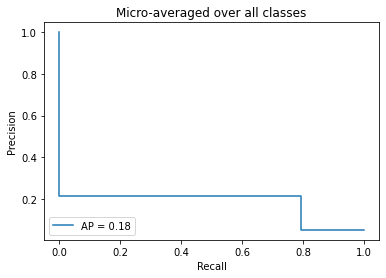

In [17]:
#Getting precision vs recall curves
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(P2[:][i], Q2[:][i])
    average_precision[i] = average_precision_score(P2[:][i], Q2[:][i])
#micro-average: quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    P2.ravel(), Q2.ravel()
)
average_precision["micro"] = average_precision_score(P2, Q2, average="micro")
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

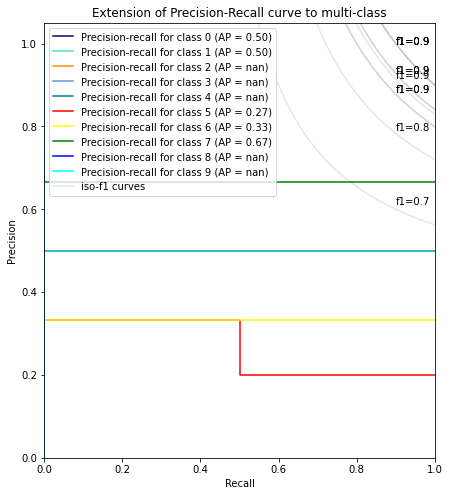

In [18]:
import matplotlib.pyplot as plt
from itertools import cycle
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "red", "yellow", "green", "blue", "cyan", "purple"])
_, ax = plt.subplots(figsize=(7, 8))
# f_scores = np.linspace(0.2, 0.8, num=4)
f_scores=f2
#f_scores=f2
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

for i, color in zip(range(10), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")
plt.show()